In [1]:
import pbjam as pb
from pbjam.asy_peakbag import asymptotic_fit, star
import lightkurve as lk
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np

In [2]:
kic = '4448777'
numax = [220.0, 3.0]
dnu = [16.97, 0.01]
teff = [4750, 100]

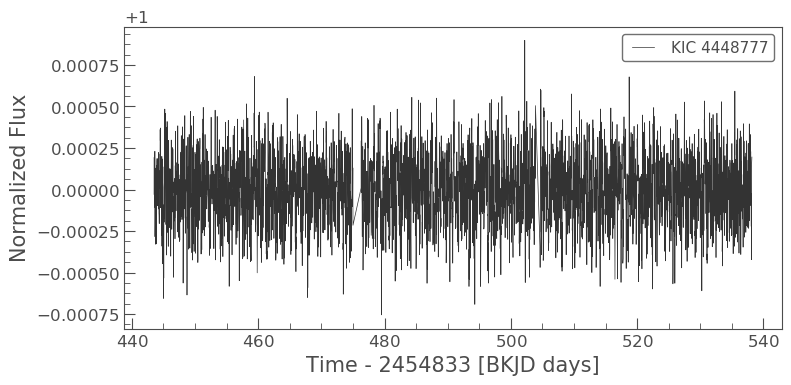

In [3]:
lc = lk.search_lightcurvefile(kic, quarter=5).download().PDCSAP_FLUX
lc = lc.remove_nans().normalize().flatten().remove_outliers()
lc.plot()

In [4]:
p = lc.to_periodogram(freq_unit=u.microHertz, maximum_frequency=280, minimum_frequency=160).flatten()

In [5]:
# Initialize a star class instance with, frequency, power, numax, dnu and teff
snr = np.array(p.power)/np.median(np.array(p.power))
s = star(np.array(p.frequency), snr, {'numax': numax, 'dnu': dnu, 'teff': teff})

In [6]:
# Epsilon can be set manually, but otherwise the below happens internally
ge_vrard = pb.epsilon()
ep_vrard = ge_vrard(dnu, numax, teff)
print(f'Epsilon from Vrard : {ep_vrard}')
s.epsilon = ep_vrard

Epsilon from Vrard : (1.3781589243447712, 0.1)


In [7]:
# Set things up for the asymptotic fit, by default this happens internally as well
s.parse_asy_pars()

[220.0,
 16.97,
 1.3781589243447712,
 0.001,
 1.697,
 1.3993462295506494,
 76.0109034792672,
 1e-20,
 4000]

In [8]:
# Do the asymptotic fit on a star class instance
modeID = asymptotic_fit(s)

Burningham
Sampling


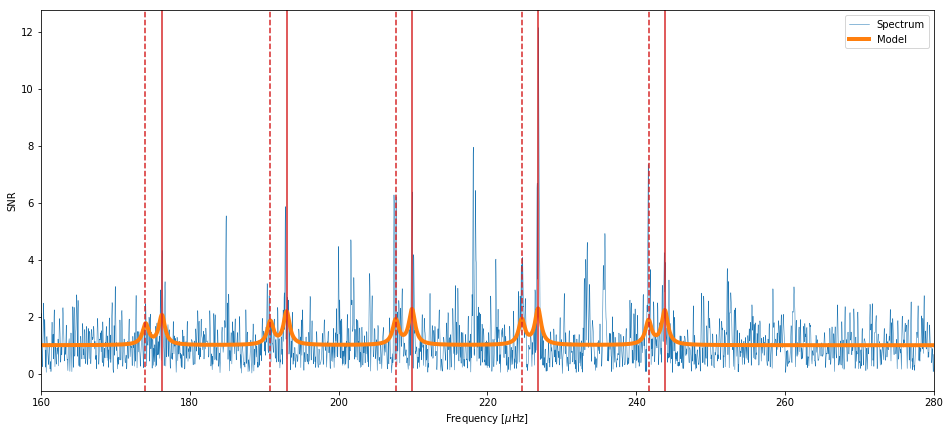

In [9]:
fig, ax = plt.subplots(figsize = (16,7))
ax.set_xlim(min(s.f),max(s.f))
ax.plot(s.f, snr, lw = 0.5, label = 'Spectrum')
ax.plot(s.f, s.asy_model, label = 'Model', lw = 4)
ax.set_xlabel('Frequency [$\mu$Hz]')
ax.set_ylabel('SNR')
for i in range(len(modeID)):
    if modeID['ell'][i] == 0:
        ls = '-'
    else:
        ls = '--'
    plt.axvline(modeID['nu_mu'][i], color = 'C3', ls = ls)
ax.legend()